In [36]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sys

# SKLearn related imports
import sklearn
import sklearn.metrics as skmetrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

# NLTK Text Processing package
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# GenSim
import gensim

In [2]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./lexvec.enwiki+newscrawl.300d.W.pos.vectors')

In [3]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6212161779403687),
 ('monarch', 0.5939741730690002),
 ('prince', 0.565595269203186),
 ('throne', 0.5191949009895325),
 ('princess', 0.5010462403297424),
 ('emperor', 0.4941234588623047),
 ('consort', 0.4744755029678345),
 ('empress', 0.47122541069984436),
 ('regent', 0.4650477468967438),
 ('betrothed', 0.45985016226768494)]

In [4]:
df = pd.read_csv('../hackathon-5-learning/02-text-in-practice/data/uci-news-aggregator.csv')
df.dtypes

ID            int64
TITLE        object
URL          object
PUBLISHER    object
CATEGORY     object
STORY        object
HOSTNAME     object
TIMESTAMP     int64
dtype: object

In [5]:
df = df[['TITLE', 'CATEGORY']]
df.columns = ['title', 'category']
df.head()

,title,category
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [6]:
sample_idxs = random.sample(range(1, 400000), 2500)

In [7]:
# Extract document tokens
documents = df['title'].values[sample_idxs]
tokens = [[word for word in document.split()] for document in documents]

In [8]:
# Convert tokens into vector representation
vectors = [np.array([model.wv[token] if token in model.wv else model.wv['the'] for token in sentence]) for sentence in tokens]

In [9]:
# Average word vectors to get document representation
means = [document.mean(axis=0) for document in vectors]

In [14]:
# Convert list of document representations into matrix
vectorized = np.array(means)
vectorized.shape

(2500, 300)

In [15]:
len(documents)

2500

In [12]:
labels = df['category'].values[sample_idxs]
pd.Series(labels).value_counts()

e    862
b    690
t    654
m    294
dtype: int64

In [37]:
homogeneities = []
completeness = []
v_score = []
adjusted_rand = []
silhouette = []
for i in range(2, 150):
    sys.stdout.write('clutering with %d'%i)
    km = MiniBatchKMeans(n_clusters=i, init='k-means++')
    km.fit(vectorized)
    homogeneities.append(skmetrics.homogeneity_score(labels, km.labels_))
    #print("Homogeneity: %0.3f" % skmetrics.homogeneity_score(labels, km.labels_))
    completeness.append(skmetrics.completeness_score(labels, km.labels_))
    #print("Completeness: %0.3f" % skmetrics.completeness_score(labels, km.labels_))
    v_score.append(skmetrics.v_measure_score(labels, km.labels_))
    #print("V-measure: %0.3f" % skmetrics.v_measure_score(labels, km.labels_))
    adjusted_rand.append(skmetrics.adjusted_rand_score(labels, km.labels_))
    #print("Adjusted Rand-Index: %.3f"
    #      % skmetrics.adjusted_rand_score(labels, km.labels_))
    silhouette.append(skmetrics.silhouette_score(vectorized, km.labels_, sample_size=1000))
    #print("Silhouette Coefficient: %0.3f"
    #      % skmetrics.silhouette_score(vectorized, km.labels_, sample_size=1000))

clutering with 2clutering with 3clutering with 4clutering with 5clutering with 6clutering with 7clutering with 8clutering with 9clutering with 10clutering with 11clutering with 12clutering with 13clutering with 14clutering with 15clutering with 16clutering with 17clutering with 18

KeyboardInterrupt: 

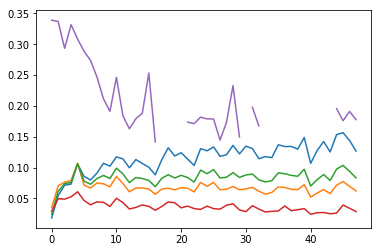

In [34]:
import matplotlib.pyplot as plt
plt.plot(homogeneities)
plt.plot(completeness)
plt.plot(v_score)
plt.plot(adjusted_rand)
plt.plot(silhouette)
plt.show()

In [13]:
labels = df['category'].values[sample_idxs]

color_map = {'b':'r', 't':'g', 'e':'b', 'm':'c'}
colors = [color_map[label] for label in labels]
size = [10 for i in range(len(labels))]

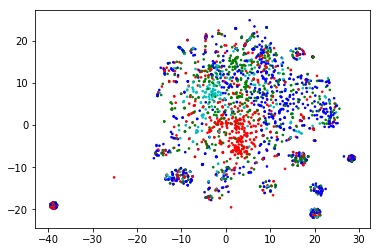

In [16]:
reduced_data = TSNE(n_components=2).fit_transform(array)

plt.scatter(reduced_data[:,0], reduced_data[:,1], marker='.', c=colors, s=size)

In [50]:
df['category'].unique()

array(['b', 't', 'e', 'm'], dtype=object)